# Titanic Dataset: Who Most Likely Survived? 

#### By Cohort B Team 6: (Sylar)Jiajian Guo, Lequn Yu, Qiqi Tang, Scott McCoy, Tiam Moradi

**Project Objective**: Our Goal for the project is to find variables that are correlated or associated with surviving the Accident of the Titanic. In our analysis, we will attempt to develop a machine learning model to capture these relationships and provide complementary visualizations with Tableau.

Link to data source: https://www.openml.org/d/40945

Link to dashboard:  https://public.tableau.com/profile/lequn.yu#!/vizhome/team6bproject/Dashboard1

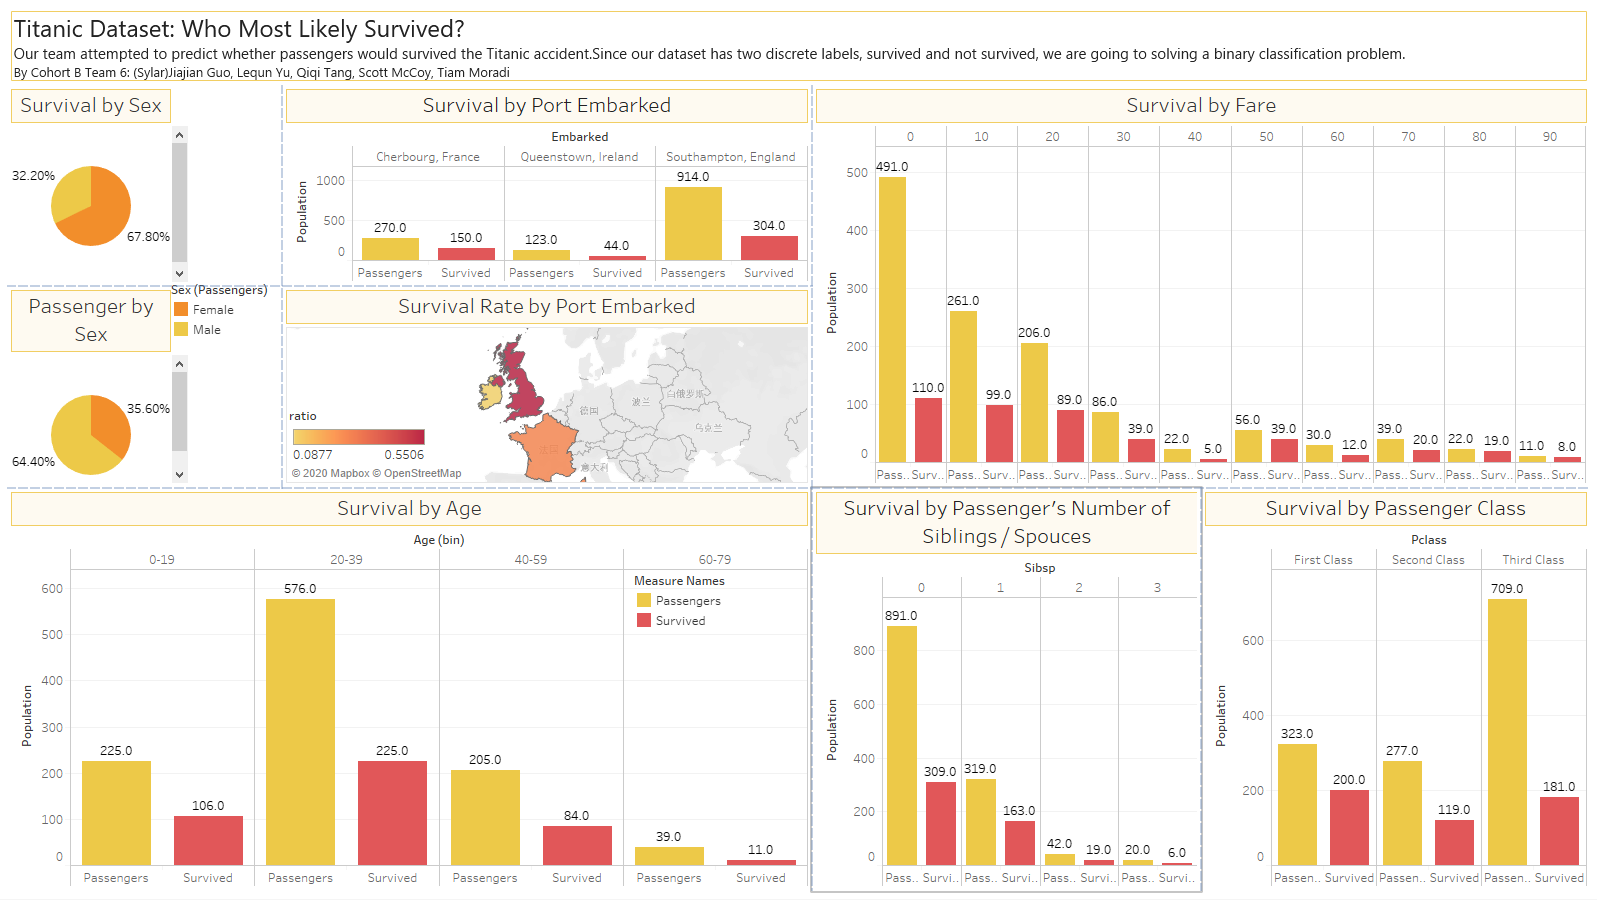

### Preview of the Dataset

In [1]:
%%bigquery
SELECT *
FROM `ba775-team-6b.Project.passengers`
LIMIT 5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,None,S,None,261.0,None
1,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,None,NaN,"Belfast, NI"
2,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,None,S,None,NaN,"Liverpool, England / Belfast"
3,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,None,NaN,None
4,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,None,110.0,None


### How many people survived the Titanic shipwreck? 

The first questions we asked were how many people in the dataset survived the accident, and what is the overall survival rate? With 500 passengers survived out of 1309 in total, only 38 percent of passengers survived.

In [3]:
%%bigquery
SELECT count(CASE WHEN survived = 1 THEN 1 ELSE NULL END) AS number_of_survivors
FROM `ba775-team-6b.Project.passengers`

,number_of_survivors
0,500


In [4]:
%%bigquery
SELECT count(*) AS number_of_passengers
FROM `ba775-team-6b.Project.passengers`

,number_of_passengers
0,1309


In [6]:
%%bigquery
SELECT (count(CASE WHEN survived = 1 THEN 1 ELSE NULL END) / count(*)) * 100 AS passenger_survival_percentage
FROM `ba775-team-6b.Project.passengers`

,passenger_survival_percentage
0,38.197097


## Dataset Features

The titanic dataset also has a number of features about each passenger that could be used as indicators affecting their chances of survival. We analyzed each feature independently and found that the most significant indicators of survival were sex and passenger class. Our analysis focuses on these features, but also discusses other relevant features that have potential predictive capability.

### Survival by Sex 

After calculating survival rates based on sex, we found that female passengers had a significantly higher survival rate at 72 percent, to male passengers at 19 percent.

In [1]:
%%bigquery
SELECT sex, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY sex

,sex,Number_Passengers,Number_Survivors,Survival_Percentage
0,male,843,161,0.190985
1,female,466,339,0.727468


### Survival by Passenger Class

When looking into survival rate based on passenger class, we see that class 1 had the highest survival rate with 61 percent, followed by class 2 with 42 percent, and finally class 3 with 25 percent. One thing to notice is that there are more passengers in class 3 than class 1 and class 2 combined. Our hypothesis for why there is a big disparity of the survival rates is because of the locations of the passenger rooms on the titanic for a different passenger classes.

In [9]:
%%bigquery
SELECT pclass, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY pclass
ORDER BY pclass
#comparing survival rate between passenger classes

,pclass,Number_Passengers,Number_Survivors,Survival_Percentage
0,1,323,200,0.619195
1,2,277,119,0.429603
2,3,709,181,0.255289


### Survival by Age Group

Following the theme of analyzing survival rates based on different factors, we decided to compare the survival rates based on age. We define a child is a person under 18, an adult is a person between the ages of 18 and 50, and Elder as a person over 50 years old. Children had the highest survival rate, followed by elderly and adults. With the dataset, we also see that there was a quite large group called None representing Null values within the age column of our dataset. 

In [2]:
%%bigquery
WITH AGEGROUP AS

(SELECT *, 
CASE WHEN age > 0 AND age < 18 THEN  'Child'
WHEN  age >= 18 AND age  <= 50 THEN 'Adult'
WHEN age >50  THEN 'Elder'
ELSE NULL END AS age_group
FROM `ba775-team-6b.Project.passengers`
)

SELECT age_group, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM AGEGROUP
GROUP BY age_group
#comparing survival rate between age groups

,age_group,Number_Passengers,Number_Survivors,Survival_Percentage
0,None,358,111,0.310056
1,Adult,782,302,0.386189
2,Child,154,81,0.525974
3,Elder,15,6,0.400000


Of the 263 passengers with null values in the age column, 208 were 3rd class passengers. 

In [3]:
%%bigquery
SELECT  pclass, count(*) count_age_unknown
FROM
  `ba775-team-6b.Project.passengers`
WHERE age IS NULL
GROUP BY pclass

,pclass,count_age_unknown
0,1,39
1,2,16
2,3,208


### Survival by Passenger's Number of Siblings / Spouces

First aspect to note is that 891 passengers did not have a sibling or a spouse, yet this demographic contributed to over 68 percent of the population. It is also interesting that the group with the highest survival rate had atleast a spouse or siblings on board the Titanic. Once we look at passengers having 2 siblings or more, we see a decline in the survival rate.

In [17]:
%%bigquery
SELECT SibSp, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY SibSp
ORDER BY SibSp
#comparing survival rate between passenger numbers of siblings / spouses aboard  

,SibSp,Number_Passengers,Number_Survivors,Survival_Percentage
0,0,891,309,0.346801
1,1,319,163,0.510972
2,2,42,19,0.452381
3,3,20,6,0.300000
4,4,22,3,0.136364
5,5,6,0,0.000000
6,8,9,0,0.000000


### Survival by Port Embarked

Heren we are able to get a sense of where the passengers have arrived from.

In [18]:
%%bigquery
SELECT 
CASE
WHEN embarked = 'C' THEN 'Cherbourg, France'
WHEN embarked = 'Q' THEN 'Queenstown, Ireland'
WHEN embarked = 'S' THEN 'Southampton, England'
END AS port_of_embarkation, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
WHERE embarked IS NOT NULL
GROUP BY embarked
ORDER BY embarked
#comparing survival rate between passenger with different ports embarked

,port_of_embarkation,Number_Passengers,Number_Survivors,Survival_Percentage
0,"Cherbourg, France",270,150,0.555556
1,"Queenstown, Ireland",123,44,0.357724
2,"Southampton, England",914,304,0.332604


Further analysis shows us that Cherbourg, the port with the highgest survival percentage, also had the highest share of first class passengers (52% compared to 2% and 19% for Queenstown and Southampton respectively). 

In [4]:
%%bigquery
SELECT
  CASE
    WHEN embarked = 'C' THEN 'Cherbourg, France'
    WHEN embarked = 'Q' THEN 'Queenstown, Ireland'
    WHEN embarked = 'S' THEN 'Southampton, UK'
END
  AS port_of_embarkation,
    pclass,
  COUNT(*) Number_Passengers,
  CASE WHEN embarked = 'C' THEN ROUND((count(*) / 270),2)
    WHEN embarked = 'Q' THEN ROUND((count(*) / 123),2)
    WHEN embarked = 'S' THEN ROUND((count(*) / 913),2)
END
  AS pclass_percentage_by_port

FROM
  `ba775-team-6b.Project.passengers`
WHERE
  embarked IS NOT NULL
GROUP BY
  embarked,
  pclass
ORDER BY
  embarked,
  pclass

,port_of_embarkation,pclass,Number_Passengers,pclass_percentage_by_port
0,"Cherbourg, France",1,141,0.52
1,"Cherbourg, France",2,28,0.10
2,"Cherbourg, France",3,101,0.37
3,"Queenstown, Ireland",1,3,0.02
4,"Queenstown, Ireland",2,7,0.06
5,"Queenstown, Ireland",3,113,0.92
6,"Southampton, UK",1,177,0.19
7,"Southampton, UK",2,242,0.27
8,"Southampton, UK",3,495,0.54


### Survival by Fare Group 

Here we have define the fare to be cheap if the price was under 10 dollars, if the fair was over 10 but less than 30 dollars then its mid , and if the fare price was over 30 dollars, then we would define that as expensive. There was a small portion of the passengers that had missing values, however for the data that we do have, expensive fare prices had the highest survival rate, followed by expensive and cheap fare tickets. 

In [5]:
%%bigquery
WITH FAREGROUP AS

(SELECT *, 
CASE WHEN fare > 0 AND fare < 10 THEN  'Cheap'
WHEN  fare >= 10 AND fare  < 30 THEN 'Mid'
WHEN fare >= 30  THEN 'Expensive'
ELSE NULL END AS fare_group
FROM `ba775-team-6b.Project.passengers`
)

SELECT fare_group, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM FAREGROUP
GROUP BY fare_group
ORDER BY (sum(survived) / count(*)) DESC
#comparing survival rate between passenger with different fare paid

,fare_group,Number_Passengers,Number_Survivors,Survival_Percentage
0,Expensive,350,202,0.577143
1,Mid,467,188,0.402570
2,Cheap,474,108,0.227848
3,None,18,2,0.111111


The fare paid by each passenger is also strongly associated with passenger class, and we can see that the survival percentage by fair group is similar to the survival percentage by passenger class. Below is the average fair paid by each passenger class. 

In [6]:
%%bigquery
SELECT pclass, ROUND(AVG(fare),2) avg_fare
FROM
  `ba775-team-6b.Project.passengers`
GROUP BY pclass
ORDER BY AVG(fare) DESC

,pclass,avg_fare
0,1,87.51
1,2,21.18
2,3,13.30


After performing our initial exploratory data analysis we found that sex and passenger class were most associated with an increased chance of survival. We also saw some correlation between our features that might distort the predictive value of any variable. Our next step would be to develop and tune a machine learning model to best make predictions about survival based on data.

## Who Most Likely Survived: Machine Learning

Our team attempted to predict whether passengers would survive the Titanic accident based on their features. Since our dataset has two discrete labels, survived and not survived, we have a binary classification problem. Our algorithm of choice is Logisitic Regression, and below is how we structured our steps leading up to evaluating the test set. 

#### Preprocessing the Dataset
The first cell below shows preprocessed features that are used for our classification model. 
Since the majority of our data is text, we wanted to one-hot encode features such as sex, Embarked, and Pclass. 
With a Logisitic Regression, having one-hot encoded data will improve the model's performance because 
our features will be transformed from label encoded features to numerical encoded features. 

For the numerical features, we investigated both keeping the columns values or to standardize their values.Traditionally, scaling numerical values is done in order for gradient descent to have the best 
trajectory towards the global minimum. Keeping these columns with their original values,
those features would dominate the contribution of predictions and direction of gradient descent, as their as their parameters would be the largest values and gradients. However, upon testing with both standardized and non-standardized versions, we saw that there was no boost in performance, therefore for interpretability, we kept the original column values.

We experimented with a feature called Title, where we would label encode the Titles of passengers on the ship. Our aim was to see if persons with titles such as Master, Don, Capt, Major, had a better chance of surviving, along with providing any predicitive power to the model. However, this feature actually hindered performance, therefore we removed it from further testing.


To split the data into a training and testing set, we used the RAND() function to create random values for the whole dataset, and then used a WHERE condition to 
filter the data into two separate sets. Since the numbers are randomly generated, we can consider this to be a random shuffle of the data.

#### Model Performance 
First, here is a graph of our loss for both the training and test set. Here we can see that our model is not overfitting to the training set, and this is because of the two forms of regularization that are implemented in the model: Early Stopping and L1 regularization. Early stopping is a technique that is often deployed with Deep Learning models, but can be applied to traditional machine learning methods; the premise is that we monitor the loss of the evaluation set, and the moment we notice that the loss is increasing, we stop training and revert the parameters to the iteration before the first instance of overfitting would occur. This allows the model to maintain a proper balance of bias and variance. 

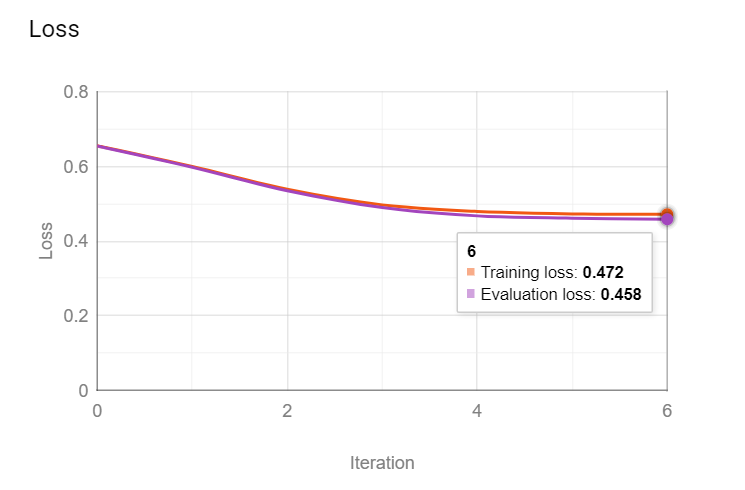

When evaluating the test set, our metrics are as follows:

- **Accuracy: 79.5%** 
- **Area Under the ROC curve: 84.5%**
- **Precision: 70.4%**
- **Recall: 71.9%**
- **F1:score 71.1%**

Overall we believe that this is a good baseline score, but much can be improved. Although the accuracy is 79.5 percent, it important to focus on the precision and recall scores, since we are dealing with an imbalanced dataset; we have a higher proportion of passengers that did not survive in comparison to passengers who survived. Based on our evaluation, our model is having some difficulty with learning some instances of the True positives and True Negatives. This can possibly be explained by the test distribution being different for both classes in comparison of the training set, or it could be that the examples in the test set would be similar to each other, and thus produce false positives and false negatives.


We can see that the model is learning parameters to fit well to the positive class; that is, the Logisitic Regression is learning patterns for people who survived the Titanic accident and is having a hard time learning patterns for the people who did not survive the accident. We know this because we have a significantly higher precision score in comparison to recall ; Our precision score is an indicator of how well our model is learning true positives, and recall is an indicator of how well our model is learning true negatives. This could also potentially suggest that the distribution of the negative class is more scattered and thus producing more 
false negatives. One way we could check for this is to perform Principal Component Analysis(PCA), and plot the data and label them based on class to either prove or disprove our hypothesis on the matter.

Based on the area under the ROC curve, 84.5 percent of the time our model ranks a random positive example more highly in comparison to a random negative example; meaning that the models is making good predictions and that across the majority of thesholds, it is often correct. 


### Feature Importance
After the model has trained, we are able to get the coefficients of the model, this can be found in the final cell.
We notice that isMale, isFemale are going to be the main contributors to whether a passengers survives or not, and this is also backed up by our exploratory data analysis, where female had a significantly higher survival rate. The next set of features that demonstrated importance are passenger class 1 and passenger class 3; here we can see that being in passenger class 1 increases the likelihood of surviving where as passenger class 3 decreases the likelihood of survival. This confirms our analysis where we saw passenger class 1 have the highest survival rate and passenger class 3 having the lowest survival rate. It is rather interesting that the model deemed passenger class 2 to not be as important of a feature when predicting survival rate; this could be because passenger class 2 had the least amount of people. Finally, Embarked_C (Cherbourg, France) was another important feature for predictions, which also follows our earlier analysis because passengers from this port had the highest survival rate amongst the 3 ports. 

It is also important to note that our other features such as: Passenger class 2, Age, Fare, Parch and SibSp are not making contributions we as anticipated, and that is down to the second form of regularization being placed on the model, which is the L1 regularization. This method involves adding the magnitude times a lambda value to the cost function, and allows the model to zero out features that were not able to contribute to the form of learning for the Logisitic Regression. For the bigquery parameter, we tried various values ranging from .0001 to 5. The reason the range of values tested is so vast is because, if we add too much regularization, we can cause the model to underfit, where too little regularization could result in overfitting; although including early stopping almost prevented this case from happening. With the increase in this parameter, we saw an increase in precision and a decrease in recall, thus leading to a potential high bias and low variance case. That being said, we believe the value of 5 injects enough noise to where we are allowing the model to identify key features amongst the total feature space and maximizes its predictive performance.

#### Limitations
One of the limitations is the amount of the data we have to train the model. There were roughly 1300 data points and thus naturally difficult to be able to generalize to the test set well. In addition, because this dataset is of the Titantic accident, there is no other method of curating additional information that regards the passengers. 

Another limitation was certain features had null values. While we are able to impute these values, it is still rather difficult to tell if the values were a true representative of the missing passengers age's. Perhaps if we used more sophisticated models such as XGBoost or CATboost, these null values could have been more thoroughly extrapolated.

In [1]:
%%bigquery 
CREATE OR REPLACE TABLE `ba775-team-6b.Project.preprocessed_data` as (SELECT  Survived,
CASE WHEN Sex = 'male' Then 1 Else 0 END as isMale,
CASE WHEN Sex = 'female' Then 1 Else 0 End as isFemale,
CASE WHEN Pclass = 1 THEN 1 ELSE 0 END as Pclass1,
CASE WHEN Pclass = 2 THEN 1 ELSE 0 END as Pclass2,
CASE WHEN Pclass = 3 THEN 1 ELSE 0 END as Pclass3,
SibSp,
Parch,
Age,
Fare, 
CASE WHEN Embarked = 'S' THEN 1 Else 0 END as Embarked_S,
CASE WHEN Embarked = 'Q' THEN 1 ELSE 0 END as Embarked_B,
CASE WHEN Embarked = 'C' THEN 1 ELSE 0 END as Embarked_C,
CASE WHEN RAND() < .3 OR RAND() > .55 THEN 'Training'
     WHEN RAND() >=.3 OR RAND() <= .55 THEN 'Test' 
     ELSE 'Training'
     END as data_split
FROM `ba775-team-6b.Project.passengers`)

""


In the next two cells, we are going to be using the data_split feature in order to parition the table into a training and test set to feed into the model.

In [53]:
%%bigquery 
CREATE OR REPLACE table  `ba775-team-6b.Project.preprocessed_data_train` as (
SELECT * FROM `ba775-team-6b.Project.preprocessed_data`
WHERE data_split = 'Training')


""


In [54]:
%%bigquery
CREATE OR REPLACE table  `ba775-team-6b.Project.preprocessed_data_test` as (
SELECT * FROM `ba775-team-6b.Project.preprocessed_data`
WHERE data_split = 'Test')


""


The following cells are going to train and evaluate the model

In [65]:
%%bigquery
CREATE OR REPLACE MODEL `ba775-team-6b.Project.classification_model`
OPTIONS(model_type='logistic_reg',L1_REG=3,labels = ['survived'])
AS
SELECT * EXCEPT(data_split) FROM `ba775-team-6b.Project.preprocessed_data_train`

""


In [66]:
%%bigquery
SELECT *
FROM ML.EVALUATE
(
    MODEL `ba775-team-6b.Project.classification_model`,  
    (SELECT * EXCEPT(data_split) FROM `ba775-team-6b.Project.preprocessed_data_test`)
)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.704698,0.719178,0.795181,0.711864,0.446099,0.845075


In [67]:
%%bigquery 
Select processed_input,weight FROM 
ML.WEIGHTS(MODEL `ba775-team-6b.Project.classification_model`)


,processed_input,weight
0,isMale,-1.277862
1,isFemale,1.277862
2,Pclass1,0.840110
3,Pclass2,0.023494
4,Pclass3,-0.746184
5,SibSp,-0.190457
6,Parch,0.000000
7,Age,-0.027828
8,Fare,0.000000
9,Embarked_S,-0.145767
